<a href="https://colab.research.google.com/github/GilbertoRocha/Estudos/blob/master/FormacaoCientistaDadosPythoneR/Python/Previsao_arima_serie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Previsão de series temporais, usando media movel e arima

In [25]:
# instalando o pacote
%pip install pyramid-arima

     |████████████████████████████████| 604kB 2.9MB/s 


In [26]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from io import StringIO
from statsmodels.tsa.arima_model import ARIMA
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

In [2]:
# simula a carga de um csv
arq = StringIO("""Month,#Passengers
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119
1949-11,104
1949-12,118
1950-01,115
1950-02,126
1950-03,141
1950-04,135
1950-05,125
1950-06,149
1950-07,170
1950-08,170
1950-09,158
1950-10,133
1950-11,114
1950-12,140
1951-01,145
1951-02,150
1951-03,178
1951-04,163
1951-05,172
1951-06,178
1951-07,199
1951-08,199
1951-09,184
1951-10,162
1951-11,146
1951-12,166
1952-01,171
1952-02,180
1952-03,193
1952-04,181
1952-05,183
1952-06,218
1952-07,230
1952-08,242
1952-09,209
1952-10,191
1952-11,172
1952-12,194
1953-01,196
1953-02,196
1953-03,236
1953-04,235
1953-05,229
1953-06,243
1953-07,264
1953-08,272
1953-09,237
1953-10,211
1953-11,180
1953-12,201
1954-01,204
1954-02,188
1954-03,235
1954-04,227
1954-05,234
1954-06,264
1954-07,302
1954-08,293
1954-09,259
1954-10,229
1954-11,203
1954-12,229
1955-01,242
1955-02,233
1955-03,267
1955-04,269
1955-05,270
1955-06,315
1955-07,364
1955-08,347
1955-09,312
1955-10,274
1955-11,237
1955-12,278
1956-01,284
1956-02,277
1956-03,317
1956-04,313
1956-05,318
1956-06,374
1956-07,413
1956-08,405
1956-09,355
1956-10,306
1956-11,271
1956-12,306
1957-01,315
1957-02,301
1957-03,356
1957-04,348
1957-05,355
1957-06,422
1957-07,465
1957-08,467
1957-09,404
1957-10,347
1957-11,305
1957-12,336
1958-01,340
1958-02,318
1958-03,362
1958-04,348
1958-05,363
1958-06,435
1958-07,491
1958-08,505
1958-09,404
1958-10,359
1958-11,310
1958-12,337
1959-01,360
1959-02,342
1959-03,406
1959-04,396
1959-05,420
1959-06,472
1959-07,548
1959-08,559
1959-09,463
1959-10,407
1959-11,362
1959-12,405
1960-01,417
1960-02,391
1960-03,419
1960-04,461
1960-05,472
1960-06,535
1960-07,622
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432""")

base = pd.read_csv(filepath_or_buffer=arq)


# transforma a coluna month em um tipo data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

# parse_dates recebe o nome da coluna, que por coincidencia é Month
#base = pd.read_csv(filepath_or_buffer=arq, parse_dates=['Month'], index_col = 'Month', date_parser=dateparse)
#como e simulado a leitura de csv, entao a conversao e feita diferente
base['Month'] = base['Month'].apply(dateparse)
print(base.dtypes)


# alterado o index, como é feito um simulado de carga de csv, então isso ficou diferente
# so pode ter uma variavel no df e o indice
base.index = base['Month']
base = base.drop('Month', axis=1)
base.head()

Month          datetime64[ns]
#Passengers             int64
dtype: object


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


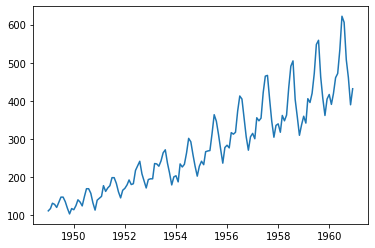

In [4]:
ts = base['#Passengers']
plt.plot(ts)
plt.show()

In [5]:
# usando a media (errado, pois a serie não é estacionaria)
ts.mean()

280.2986111111111

In [7]:
# pegar a media do ultimo ano, ainda bem impreciso
ts['1960-01-01':'1960-12-01'].mean()

476.1666666666667

In [8]:
# usando a media movel das 12 datas anteriores
media_movel = ts.rolling(window=12).mean()
print(media_movel)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: #Passengers, Length: 144, dtype: float64


In [10]:
# exemplo, fazendo manual em duas datas, pegando duas faixas de 12 meses e tirando a media
print(ts[0:12].mean())
print(ts[1:13].mean())

126.66666666666667
126.91666666666667


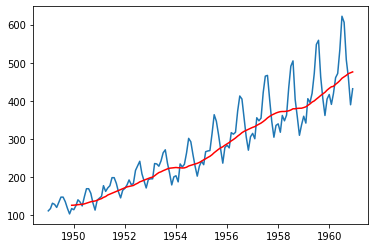

In [11]:
# visualizando a media movel e dados
plt.plot(ts)
plt.plot(media_movel, color='red')
plt.show()

In [0]:
# faz a previsao com a media movel, como nao tem biblioteca especifica pra isso , e feito a codificação na mao

previsoes = []
for i in range(1, 13):
  superior = len(media_movel) - i
  inferior = superior - 11
  #print(inferior)
  #print(superior)
  #print('----------')
  previsoes.append(media_movel[inferior:superior].mean())

In [16]:
# invertendo os valores
previsoes = previsoes[::-1]
print(previsoes)



[405.50757575757575, 409.90909090909093, 414.34848484848493, 418.52272727272725, 422.75757575757575, 427.1060606060606, 431.5, 436.04545454545456, 440.49999999999994, 444.9318181818181, 449.3787878787878, 453.52272727272737]


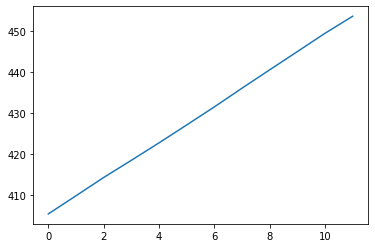

In [17]:
# visualizando
plt.plot(previsoes)
plt.show()

**Usando o ARIMA**

In [20]:
# criando o modelo
# parametros order = numero termos auto-regressivos, numero da media movel e numero de diferenças não sazionais
modelo = ARIMA(ts, order=(2, 1, 2))
modelo_treinado = modelo.fit()
print(modelo_treinado.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.716
Date:                Fri, 20 Mar 2020   AIC                           1344.043
Time:                        17:56:49   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passeng

In [22]:
# fazendo a previsao
previsoes = modelo_treinado.forecast(steps = 12)
print(previsoes[0])

[433.13422182 450.91903911 479.85428659 512.02032366 539.36963887
 555.8442862  558.78084857 549.29983462 531.66962729 511.90433422
 496.03186256 488.51530253]


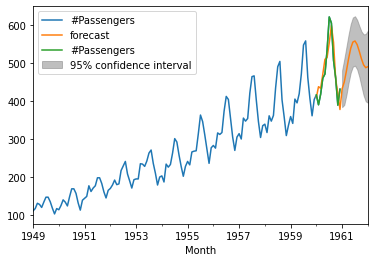

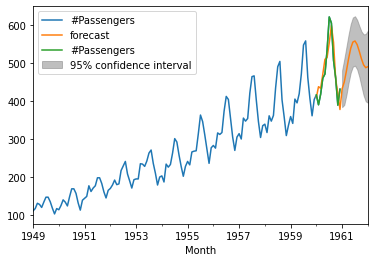

In [23]:
# visualizando
eixo = ts.plot()

modelo_treinado.plot_predict('1960-01-01', '1962-01-01', ax = eixo, plot_insample=True)

**Usando o auto arima**

In [27]:
modelo_auto = auto_arima(ts, m = 12, seasonal=True, trace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=1154.503, BIC=1178.206, Fit time=1.648 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1145.852, BIC=1157.703, Fit time=0.522 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.420 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1403.473, BIC=1412.361, Fit time=0.058 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=1146.202, BIC=1161.016, Fit time=1.615 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=1146.630, BIC=1161.444, Fit time=0.808 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=1146.563, BIC=1164.340, Fit time=1.934 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1152.734, BIC=1161.623, Fit time=0.388 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1147.809, BIC=1162.624, Fit time=0.774 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=1137.810, BIC=1152.624, Fit time=1.276 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=1148.399, BIC=1169.139, Fit time=1.372 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1396.121, BIC=1407.972, Fit time=0.165 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 0, 12); AIC=1138.005, BIC=1155.783, Fit time=2.968 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=1148.607, BIC=1166.384, Fit time=1.057 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 12); AIC=1148.554, BIC=1169.294, Fit time=3.989 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=1146.153, BIC=1158.004, Fit time=0.535 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=1142.509, BIC=1160.287, Fit time=1.086 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=1144.105, BIC=1161.882, Fit time=1.523 seconds
Total fit time: 22.178 seconds


In [28]:
print(modelo_auto.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 12)   Log Likelihood                -563.905
Date:                            Fri, 20 Mar 2020   AIC                           1137.810
Time:                                    18:34:07   BIC                           1152.624
Sample:                                         0   HQIC                          1143.830
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0325      0.018      1.834      0.067      -0.002       0.067
ar.L1          0.7661      0.070   

In [30]:
proximos_12 = modelo_auto.predict(n_periods = 12)
print(proximos_12)

[445.00041444 421.69350943 449.21004261 489.76610859 500.83214014
 560.97791677 643.73888852 628.97232949 536.56463237 492.37012385
 425.43530882 465.39394574]
